# Group Problem (35pt)

In this homework you will implement k-means for image segmentation.

**Step 1.** Take **three** photos. Do not use very large photos. You may use the PNG and JPEG
format. For each photo,

* Load your photo into computer and get the pixels each of which is given by (R,G,B).
Use the libraries for processing image.

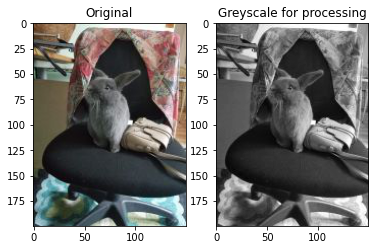

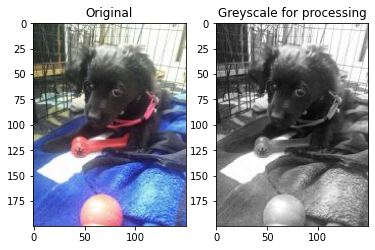

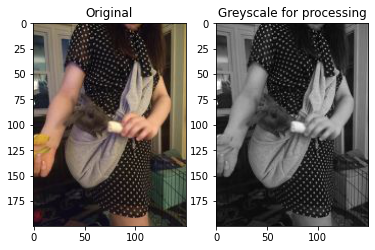

In [21]:
import math
from copy import deepcopy

import cv2 as cv
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import random
import matplotlib.pyplot as plt

my_paths = ["images_original/20210420_185512.jpg",
            "images_original/IMG_20210516_101659172.jpg",
            "images_original/IMG_20210521_204633847.jpg"]


# img0 = cv.imread("images_original/20210420_185512.jpg")
# img1 = cv.imread("images_original/IMG_20210516_101659172.jpg")
# img2 = cv.imread("images_original/IMG_20210521_204633847.jpg")

def grayscale(colors):
    """Return grayscale of given color."""
    r, g, b = colors
    return 0.07 * r + 0.72 * g + 0.21 * b


# image = np.random.uniform(255, size=(10,10,3))
# result = np.apply_along_axis(grayscale, 2, image)

# images = [img0, img1, img2]
def load_images(paths):
    images = []
    for path in paths:
        image = Image.open(path)
        image = np.array(image)
        greyscale = np.apply_along_axis(grayscale, 2, image)
        images.append(greyscale)

        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(image)
        ax[0].set_title("Original")
        ax[1].imshow(greyscale, cmap='gray')
        ax[1].set_title("Greyscale for processing")
        plt.show()

    return images


my_images = load_images(my_paths)
# red, green, blue = img.split()
# fig, ax = plt.subplots(1, 3)
# ax[0].imshow(red)
# ax[0].set_title('Red')
# ax[1].imshow(green)
# ax[1].set_title('Green')
# ax[2].imshow(blue)
# ax[2].set_title('Blue')
# plt.show()


* Apply K-means to the pixels, and rewrite the image where each pixel is replaced by
the mean of its cluster. Now you have a new photo.

0/5
1/5
2/5
3/5
4/5
cluster at (4, 0) mean:130.02305673742876
0/5
1/5
2/5
3/5
4/5
cluster at (7, 1) mean:157.85061580654792
cluster at (8, 5) mean:126.87852727505265
0/5
1/5
2/5
3/5
4/5
cluster at (7, 1) mean:155.80402465303376
cluster at (4, 8) mean:198.67505980848645
cluster at (7, 5) mean:50.02431100780176
cluster at (6, 7) mean:117.32064477770638
cluster at (3, 4) mean:89.05311366385561
0/5
1/5
2/5
3/5
4/5
cluster at (6, 5) mean:93.56556913291209
cluster at (5, 0) mean:182.25157361315968
cluster at (6, 1) mean:61.9329365835479
cluster at (1, 3) mean:44.97455982509852
cluster at (8, 3) mean:159.6577306804163
cluster at (2, 0) mean:83.57318808312894
cluster at (4, 2) mean:216.01745676466246
cluster at (6, 8) mean:146.78586575091754
cluster at (9, 1) mean:199.60452162103167
cluster at (6, 7) mean:118.16421126115871
0/5
1/5
2/5
3/5
4/5
cluster at (3, 7) mean:135.82797521355656
cluster at (5, 4) mean:163.2460276564215
cluster at (9, 5) mean:178.57039485542347
cluster at (2, 2) mean:97.2

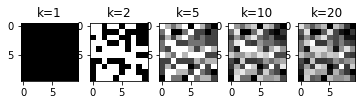

In [22]:
import math

tolerance = .0001
iterations = 5


def closest(lst, K):
    lst = np.asarray(lst)
    idx = (np.abs(lst - K)).argmin()
    return lst[idx]


def k_means(input_image, cluster_count):
    image = deepcopy(input_image)
    img_x, img_y = image.shape
    # print(img_x)
    # print(img_y)
    x_points = ([])
    y_points = ([])
    clusters = {}

    for k in range(0, cluster_count):
        random_x = random.randint(0, img_x - 1)
        random_y = random.randint(0, img_y - 1)
        x_points.append(random_x)
        y_points.append(random_y)
        point = (random_x, random_y)
        clusters[point] = []

    # print(clusters)
    # print(x_points)
    # print(y_points)
    # plt.imshow(image, cmap='gray')
    # plt.plot()
    # plt.plot(y_points, x_points, 's', c='red')
    # plt.title("Centroids")
    # plt.show()

    for i in range(0, iterations):
        print(str(cluster_count) + " Clusters " + str(i) + "/" + str(iterations))
        # plt.imshow(image, cmap='gray')
        # plt.plot(y_points, x_points, 's', c='red')
        # plt.title("Centroids")
        for x in range(img_x):
            for y in range(img_y):
                pixel_value = image[x, y]
                distances = {}
                for cluster in clusters:
                    cluster_value = image[cluster[0], cluster[1]]
                    distance = np.linalg.norm(pixel_value - cluster_value)
                    distances[cluster] = distance
                closest_cluster = min(distances, key=distances.get)
                clusters[closest_cluster].append([x, y])

        # for center in clusters:
        #     color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        #     for point in clusters[center]:
        #         plt.plot(point[1], point[0], 's', c=color)

        new_clusters = {}
        for center in clusters:
            values = []
            for point in clusters[center]:
                point_value = image[point[0], point[1]]
                values.append(point_value)
                # print(point_value)
            mean_value = np.mean(values)
            # print("mean:" + str(mean_value))
            mean_point = center
            mean_point_diff = math.inf
            for point in clusters[center]:
                point_value = image[point[0], point[1]]
                diff = abs(mean_value - point_value)
                # print(diff)
                if diff <= mean_point_diff:
                    mean_point = point
                    mean_point_diff = diff

            # print(mean_point)
            # print(mean_point_diff)

            # x_pts = ([center[0], int(mean[0])])
            # y_pts = ([center[1], int(mean[1])])
            # mean_pt = (int(mean[0]), int(mean[1]))
            # plt.plot(mean_point[1], mean_point[0], c='red')
            mean_key = (mean_point[0], mean_point[1])
            new_clusters[mean_key] = clusters[center]
        # plt.imshow(image, cmap='gray')
        # plt.title(str(cluster_count) + " Clusters " + str(i) + "/" + str(iterations))
        # plt.show()
        clusters = new_clusters

    for center in clusters:
        values = []
        for point in clusters[center]:
            point_value = image[point[0], point[1]]
            values.append(point_value)
            # print(point_value)
        mean_value = np.mean(values)
        print("cluster at " + str(center) + " mean:" + str(mean_value))
        for point in clusters[center]:
            image[point[0], point[1]] = mean_value
    # plt.imshow(image, cmap='gray')
    # plt.title("Segmented, k=" + str(cluster_count))
    # plt.show()
    return image


test_image = np.random.uniform(255, size=(10, 10, 3))
result = np.apply_along_axis(grayscale, 2, test_image)
# k_means(result, 2)
k_to_try = [1, 2, 5, 10, 20]
fig, ax = plt.subplots(1, len(k_to_try))
for i in range(len(k_to_try)):
    ax[i].imshow(k_means(result, k_to_try[i]), cmap='gray')
    ax[i].set_title("k=" + str(k_to_try[i]))
plt.show()


* Try different k from {1, 2, 5, 10, 20}. Now you have many new photos.

0/5
1/5
2/5
3/5
4/5
cluster at (11, 86) mean:93.01999233333333


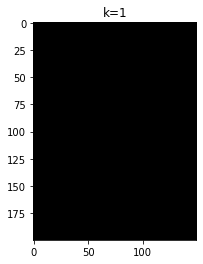

0/5
1/5
2/5
3/5
4/5
cluster at (191, 101) mean:176.3681880299865
cluster at (133, 123) mean:63.538432122047794


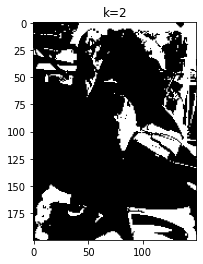

0/5
1/5
2/5
3/5
4/5
cluster at (6, 108) mean:218.71343728247248
cluster at (43, 106) mean:32.03209368149992
cluster at (60, 115) mean:118.43674589581853
cluster at (144, 142) mean:74.52051409981868
cluster at (24, 116) mean:165.5742783748254


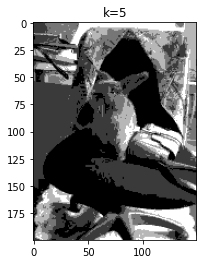

0/5
1/5
2/5
3/5
4/5
cluster at (114, 128) mean:240.9401842323651
cluster at (181, 52) mean:59.080433893482706
cluster at (37, 59) mean:149.0192258613356
cluster at (32, 8) mean:92.72345927511033
cluster at (177, 66) mean:68.29133712210795
cluster at (30, 97) mean:26.250003343973248
cluster at (60, 89) mean:82.30952351123624
cluster at (42, 30) mean:193.7867877639949
cluster at (135, 145) mean:39.849695671546534
cluster at (14, 91) mean:121.6517281051339


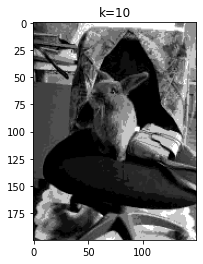

0/5
1/5
2/5
3/5
4/5
cluster at (54, 28) mean:146.73245519203414
cluster at (38, 28) mean:100.13055899835588
cluster at (147, 3) mean:66.1539135911324
cluster at (116, 109) mean:179.55617421007688
cluster at (178, 62) mean:223.47242026266417
cluster at (123, 142) mean:87.32092142163249
cluster at (158, 149) mean:24.851080766028314
cluster at (195, 33) mean:35.214806176852996
cluster at (91, 142) mean:114.67543353482115
cluster at (135, 136) mean:42.74037735672972
cluster at (92, 37) mean:77.15843959823113
cluster at (60, 138) mean:208.00147912243455
cluster at (5, 1) mean:51.40544448378474
cluster at (184, 17) mean:130.6915876421778
cluster at (161, 59) mean:15.919479477439005
cluster at (92, 136) mean:195.26761915777715
cluster at (16, 115) mean:163.0475876191645
cluster at (5, 135) mean:244.69416537274307
cluster at (199, 2) mean:58.987326279359344
cluster at (198, 64) mean:215.48588324993642


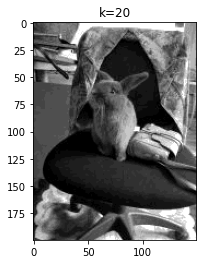

0/5
1/5
2/5
3/5
4/5
cluster at (116, 130) mean:125.37177133333333


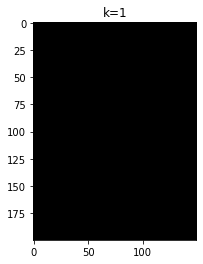

0/5
1/5
2/5
3/5
4/5
cluster at (58, 122) mean:192.9041584158416
cluster at (143, 71) mean:79.86790667033934


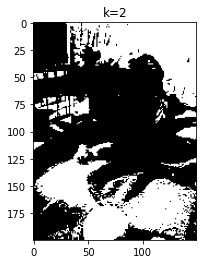

0/5
1/5
2/5
3/5
4/5
cluster at (198, 49) mean:159.65009439917364
cluster at (97, 69) mean:37.11450502554888
cluster at (76, 41) mean:233.1108826572199
cluster at (112, 32) mean:63.658253966866425
cluster at (140, 57) mean:111.08114713782695


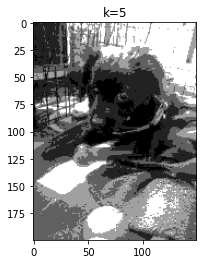

0/5
1/5
2/5
3/5
4/5
cluster at (112, 2) mean:182.702225298416
cluster at (92, 119) mean:54.61658843609985
cluster at (115, 37) mean:49.55466129192162
cluster at (134, 133) mean:94.96979126881912
cluster at (81, 66) mean:72.70319808732675
cluster at (75, 18) mean:134.19529986217356
cluster at (117, 107) mean:45.13431259677083
cluster at (117, 102) mean:29.864876401630987
cluster at (133, 113) mean:35.101718666839886
cluster at (18, 138) mean:240.12107232153977


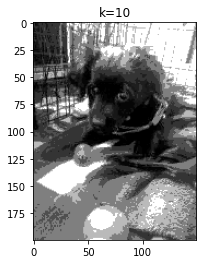

0/5
1/5
2/5
3/5
4/5
cluster at (126, 47) mean:86.03037082439472
cluster at (123, 103) mean:39.42647164179104
cluster at (196, 84) mean:125.57213785418655
cluster at (142, 2) mean:114.79087096774192
cluster at (28, 79) mean:218.81702771786885
cluster at (134, 30) mean:253.53893338838424
cluster at (157, 42) mean:150.94410619744627
cluster at (151, 102) mean:102.13951840703865
cluster at (167, 75) mean:120.15072369416349
cluster at (196, 32) mean:135.52609546405523
cluster at (105, 119) mean:50.75569409374085
cluster at (145, 64) mean:93.82630432325864
cluster at (113, 74) mean:36.05468302490115
cluster at (60, 114) mean:63.44944836225079
cluster at (145, 147) mean:74.21889462156408
cluster at (106, 71) mean:28.29029328659854
cluster at (153, 18) mean:235.32304256036656
cluster at (2, 138) mean:178.08214878365104
cluster at (96, 74) mean:49.05968653716768
cluster at (136, 132) mean:108.85670112764724


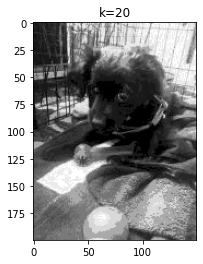

0/5
1/5
2/5
3/5
4/5
cluster at (158, 46) mean:74.57677133333333


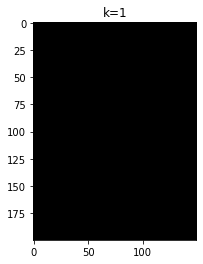

0/5
1/5
2/5
3/5
4/5
cluster at (66, 54) mean:48.752387168513714
cluster at (62, 30) mean:78.29807852878345


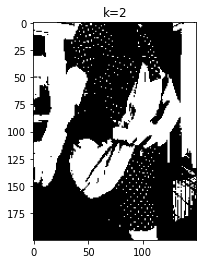

0/5
1/5
2/5
3/5
4/5
cluster at (198, 69) mean:14.848811920057102
cluster at (74, 91) mean:138.35909099940392
cluster at (4, 60) mean:44.88013706793802
cluster at (123, 134) mean:82.0746247815466
cluster at (186, 106) mean:27.210768351199903


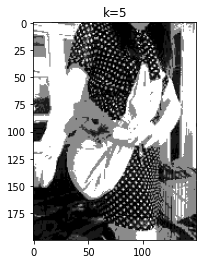

0/5
1/5
2/5
3/5
4/5
cluster at (192, 42) mean:28.263930505014645
cluster at (197, 41) mean:34.02656041290628
cluster at (25, 143) mean:117.4454661480491
cluster at (53, 67) mean:104.02902486394353
cluster at (2, 110) mean:15.961264586720956
cluster at (187, 113) mean:51.92406992815238
cluster at (73, 117) mean:75.27577811392246
cluster at (118, 12) mean:125.17952741424729
cluster at (63, 122) mean:169.42716626729535
cluster at (145, 67) mean:139.66280042774477


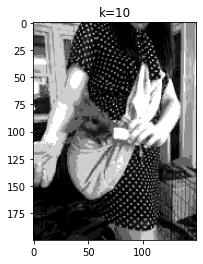

0/5
1/5
2/5
3/5
4/5
cluster at (197, 149) mean:30.966012405848474
cluster at (127, 147) mean:130.18023341072958
cluster at (172, 15) mean:24.267805295862047
cluster at (152, 91) mean:12.234644454382828
cluster at (71, 80) mean:68.62438287657532
cluster at (126, 96) mean:20.310617266535832
cluster at (90, 105) mean:157.31553310969306
cluster at (1, 8) mean:118.95946339412001
cluster at (4, 127) mean:80.0384762774207
cluster at (64, 10) mean:62.030748450397624
cluster at (189, 24) mean:15.105368663594469
cluster at (194, 65) mean:13.670786812336779
cluster at (34, 52) mean:106.52278921604714
cluster at (143, 94) mean:17.06733615757782
cluster at (187, 86) mean:55.50956005124084
cluster at (66, 70) mean:7.998046493320361
cluster at (109, 71) mean:93.47806667917216
cluster at (197, 44) mean:38.10210916554311
cluster at (10, 128) mean:50.38307531032267
cluster at (119, 110) mean:44.66602834617038


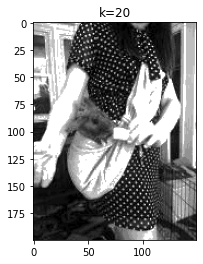

In [26]:
for my_img in my_images:
    plt.plot()
    for i in range(len(k_to_try)):
        plt.imshow(k_means(my_img, k_to_try[i]), cmap='gray')
        plt.title("k=" + str(k_to_try[i]))
        plt.show()


**Step 2.** Questions:
* What did you find concerning the relationship between k and the size of the new image?

k=1 is basically worthless. Generally, a higher k tends to mean a sharper image.

* For each of your photos, which k is the best you think? Why?

20 for all of them, it seems to provide the most detail

* Step 3. Take a new photo of which you believe k=2 is the best, and verify it use your program in step 1.

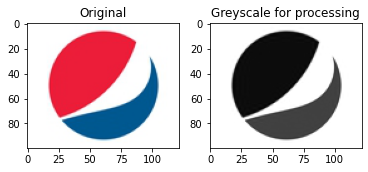

0/5
1/5
2/5
3/5
4/5
cluster at (74, 100) mean:252.88553328713817
cluster at (43, 18) mean:66.91696125153443


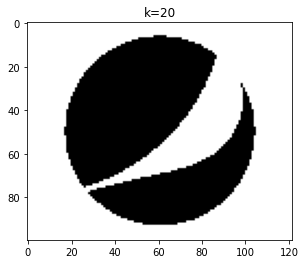

In [35]:
k_2=load_images(["images_original/pepsi-logo.jpg"])
plt.imshow(k_means(k_2[0], 2), cmap='gray')
plt.title("k=" + str(k_to_try[i]))
plt.show()


### What to Turn in
Please upload.
* Your **code and a Readme file** for compiling the code.
* Your original **photos** and produced photos.
* A pdf **report** of (a) your results in step 1, (b) your answers to step 2, and (c) your findings
in step 3. You should also show your photos in your report.